In [104]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import math

In [105]:
#importing my data from the excel sheet
df = pd.read_excel('SouthTufa_Proj1_Lines_pts03052024.xlsx')
#make figures: how dip changes versus x and y ; save out x and y position as different coordinate point and plot 

In [106]:
df_line = df['ORIG_FID'] # Each row of ORIG_FID represents one point; for a given line, we will find the min and max points and then calculate the slope
df_x = df['x'] # Extract x coordinates for top boundary from text or Excel spreadsheet
df_y = df['y'] # Extract y coordinates for top boundary from text or Excel spreadsheet
df_z = df['z'] # Extract y coordinates for top boundary from text or Excel spreadsheet
df_fid = df['ORIG_FID'] #Extract orig fids from excel

print(df_x)
print(df_y)
print(df_z)
print(df_fid)

0       322605.43750
1       322605.43750
2       322605.46875
3       322605.46875
4       322605.46875
            ...     
3137    322637.62500
3138    322637.65625
3139    322637.65625
3140    322637.65625
3141    322637.65625
Name: x, Length: 3142, dtype: float64
0       4201185.5
1       4201185.5
2       4201185.5
3       4201185.5
4       4201185.5
          ...    
3137    4201199.5
3138    4201199.5
3139    4201199.5
3140    4201199.5
3141    4201199.5
Name: y, Length: 3142, dtype: float64
0       1948.886963
1       1949.045654
2       1949.175293
3       1949.344971
4       1949.406250
           ...     
3137    1949.401611
3138    1949.409424
3139    1949.416504
3140    1949.422974
3141    1949.426758
Name: z, Length: 3142, dtype: float64
0         1
1         1
2         1
3         1
4         1
       ... 
3137    742
3138    742
3139    742
3140    742
3141    742
Name: ORIG_FID, Length: 3142, dtype: int64


In [107]:
x = df_x.tolist()
y = df_y.tolist()
z = df_z.tolist()
fid = df_fid.tolist()

print(fid)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 62, 62, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 66, 66, 66, 67, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71, 71, 71, 71, 72, 72, 72, 73, 73

In [97]:
#returning the corresponding x and y values for the min z value and max z value of a certain ORIG_FID identification
#then calculates the slope given the min and max z values; sorting through z, then y and x values given their ORID_FID identification

#df.groupby('ORIG_FID') 
#df.groupby('z')

dict = {'i': [],
        'z_min': [],
        'x_min': [],
        'y_min': [],
        'z_max': [],
        'x_max': [],
        'y_max': [],
        'dip': [],
               }

for i in range(1, 743):
    try:
      orig_fid = df[df['ORIG_FID']==i]
      
      minz_idx = np.where(orig_fid['z'] == min(orig_fid['z']))[0][0]
      minz_row = orig_fid.iloc[minz_idx]
      minz = minz_row['z']
      minz_x = minz_row['x']
      minz_y = minz_row['y']

      maxz_idx = np.where(orig_fid['z'] == max(orig_fid['z']))[0][0]
      maxz_row = orig_fid.iloc[maxz_idx]
      maxz = maxz_row['z']
      maxz_x = maxz_row['x']
      maxz_y = maxz_row['y']
     
      dict['i'].append(i)
      dict['z_min'].append(minz)
      dict['x_min'].append(minz_x)
      dict['y_min'].append(minz_y)
      dict['z_max'].append(maxz)
      dict['x_max'].append(maxz_x)
      dict['y_max'].append(maxz_y)
      
      #find direction ratios
      l = maxz_x - minz_x
      m = maxz_y - minz_y
      n1 = minz - minz
      n2 = maxz - minz

      p1p2 = (l,m,n1) #vector1
      p1p3 = (l,m,n2)  #vector2

      mag1 = math.sqrt(l**2 + m**2 + n1**2) #mag of p1p2
      mag2 = math.sqrt(l**2 + m**2 + n2**2) #mag of p1p3

      mag1timesmag2 = mag1 * mag2
      dot = np.dot(p1p2, p1p3) #dot product
      acosinput = dot/mag1timesmag2
      theta = math.acos(acosinput) #calculating arccos to find dip
      print(theta) #just to make sure theta was working properly

      dict['dip'].append(theta)
        
    except ValueError:
        print('no ORIG_FID here')

print(dict)

1.5106901590460413
0.7618618598973211
0.7120285593073608
1.025085509957253
0.44770250904369446
1.2012929114538748
1.3868528702577214
1.4551100189055206
0.8281039892174296
0.8088985862082931
0.7408905114787504
0.41465595544407136
1.4512934198637686
0.798240064592289
1.33003450614344
0.4202579220917394
0.2819971859209393
1.3558773351058013
0.29038133334024974
1.2623583179928088
1.1411162304725135
1.1029470618472186
0.3712521064857303
0.49868017885268756
1.3803612113813424
1.3940150139570746
1.4190449060336394
0.4661758780797415
1.4713206797825502
1.3881506017421725
nan
no ORIG_FID here
1.4021627170200084
1.4131583459357897
0.8586712715584116
1.232653798090249
1.3416364043478302
0.5244915290989156
1.4018687859160202
1.4430145736187043
1.3721408774742416
0.9371410603372401
0.29194948249844027
1.4252949626088105
1.4000836657766766
1.3567180143193338
nan
1.3712750489211312
1.2256386769522283
1.325587672870862
nan
1.4739465798641556
0.6823173232517591
0.6625962771996887
1.09432890732119
1.364

/var/folders/g4/70pg3s797gj94cd0g13qqb9r0000gn/T/ipykernel_1141/1380424839.py:57: RuntimeWarning: invalid value encountered in scalar divide
  acosinput = dot/mag1timesmag2


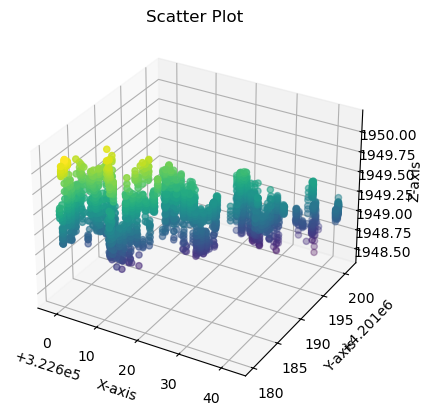

In [92]:
#Scatter plot of all data, one point being represented by its (x,y,z) coordinates
#fig = plt.figure() 
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Scatter Plot')
ax.scatter3D(df_x, df_y, df_z, c=df_z, cmap='viridis')


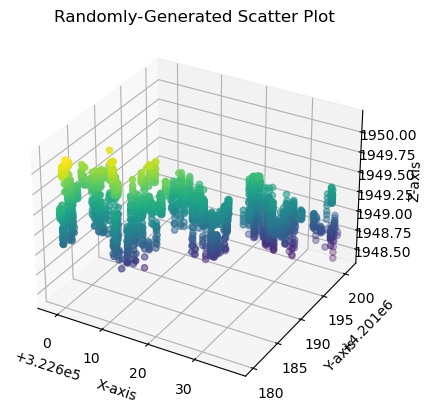

In [93]:
#Scatter plot for randomly-generated data represented by its (x,y,z) coordinates! 
fig = plt.figure() 

df1 = pd.DataFrame(df_x)
df1['y'] = df_y
df1['z'] = df_z

row_numberstart = np.random.randint(0,1000) #look of scatter plot will change!
row_numberend = np.random.randint(1000,3142)
pt = df1.iloc[row_numberstart:row_numberend,:]


x = pt['x']
y = pt['y']
z = pt['z']
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Randomly-Generated Scatter Plot')
ax.scatter3D(x, y, z, c=z, cmap='viridis');

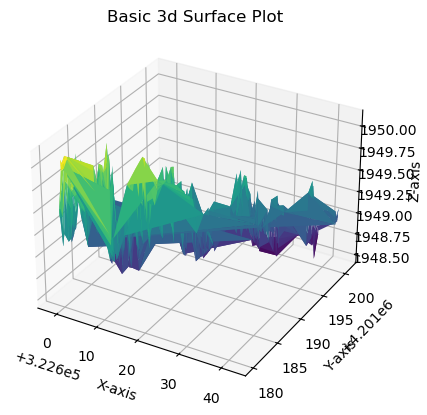

In [94]:
#Surface Plot
ax = plt.axes(projection = '3d')
ax.plot_trisurf(df_x, df_y, df_z, cmap = 'viridis')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Basic 3d Surface Plot')
plt.show()

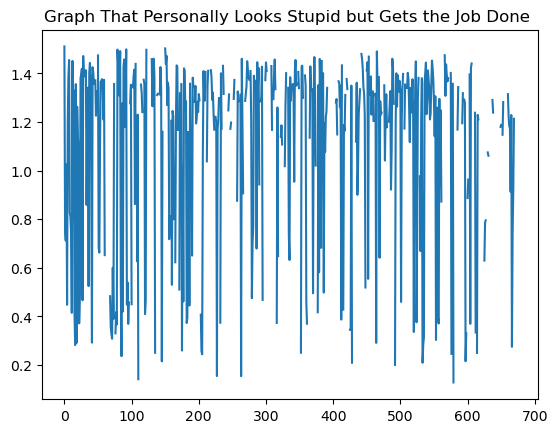

In [103]:
i = dict['i']
z_min = dict['z_min']
z_max = dict['z_max']
x_min = dict['x_min']
x_max = dict['x_max']
y_min = dict['y_min']
y_max = dict['y_max']
dip = dict['dip']

plt.plot(dip)
plt.title('Graph That Personally Looks Stupid but Gets the Job Done ')
plt.show()